
# AE 11: Modelling loan interest rates
### Author: ADD NAME HERE
### Date: ADD DATE HERE

In this application exercise we will be studying loan interest rates.
The dataset is one you've come across before in your reading -- the dataset about loans from the peer-to-peer lender, Lending Club, from the **openintro** R package.
We will use **pandas** and **scikit-learn** for data exploration and modeling, respectively.
    

In [43]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

loans = pd.read_csv('data/loans_full_schema.csv')
    


Before we use the dataset, we'll make a few transformations to it.

-   **Your turn:** Review the code below and write a summary of the data transformation pipeline.

*Add response here.*
    

In [44]:

loans['credit_util'] = loans['total_credit_utilized'] / loans['total_credit_limit']
loans['bankruptcy'] = loans['public_record_bankrupt'].apply(lambda x: 0 if x == 0 else 1).astype('category')
loans['verified_income'] = loans['verified_income'].astype('category')
loans['homeownership'] = loans['homeownership'].str.title().astype('category')
loans['homeownership'] = pd.Categorical(loans['homeownership'], categories=["Rent", "Mortgage", "Own"], ordered=True)
loans = loans.rename(columns={'inquiries_last_12m': 'credit_checks'})
loans = loans[['interest_rate', 'loan_amount', 'verified_income', 'debt_to_income', 'credit_util', 'bankruptcy', 'term', 'credit_checks', 'issue_month', 'homeownership']]
    


Here is a glimpse at the data:
    

In [45]:

print(loans.info())
print(loans.describe())
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   interest_rate    10000 non-null  float64 
 1   loan_amount      10000 non-null  int64   
 2   verified_income  10000 non-null  category
 3   debt_to_income   9976 non-null   float64 
 4   credit_util      9998 non-null   float64 
 5   bankruptcy       10000 non-null  category
 6   term             10000 non-null  int64   
 7   credit_checks    10000 non-null  int64   
 8   issue_month      10000 non-null  object  
 9   homeownership    10000 non-null  category
dtypes: category(3), float64(3), int64(3), object(1)
memory usage: 576.7+ KB
None
       interest_rate   loan_amount  debt_to_income  credit_util          term  \
count   10000.000000  10000.000000     9976.000000  9998.000000  10000.000000   
mean       12.427524  16361.922500       19.308192     0.403158     43.272000   
std


## Get to know the data

-   **Your turn:** What is a typical interest rate in this dataset? What are some attributes of a typical loan and a typical borrower. Give yourself no more than 5 minutes for this exploration and share 1-2 findings.
    

In [46]:
# add code to explore loans here

In [47]:
# add code to explore borrowers here


## Interest rate vs. credit utilization ratio

Python does not encode categories or handle missing values for you.
Linear regression models are incapable of handling either, so we will need to use one-hot encoding to encode categories and drop missing values.

**Hint**: Python also does not convert the one-hot encoded values to numerics...
so we must do this as well.
    

In [48]:

X = loans[['credit_util', 'homeownership']]

X = pd.get_dummies(X, drop_first=True)

X = X.dropna()
X = X.replace([np.inf, -np.inf], np.nan).dropna()
X = X.astype(float)

y = loans.loc[X.index, 'interest_rate']
y = y.dropna()
    


The regression model for interest rate vs. credit utilization is as follows.
    

In [49]:

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary2())
    

                   Results: Ordinary least squares
Model:                OLS              Adj. R-squared:     0.068     
Dependent Variable:   interest_rate    AIC:                59859.3779
Date:                 2024-08-06 13:50 BIC:                59888.2185
No. Observations:     9998             Log-Likelihood:     -29926.   
Df Model:             3                F-statistic:        243.7     
Df Residuals:         9994             Prob (F-statistic): 1.25e-152 
R-squared:            0.068            Scale:              23.309    
---------------------------------------------------------------------
                       Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
---------------------------------------------------------------------
const                  9.9250   0.1401 70.8498 0.0000  9.6504 10.1996
credit_util            5.3356   0.2074 25.7266 0.0000  4.9291  5.7421
homeownership_Mortgage 0.6956   0.1208  5.7590 0.0000  0.4588  0.9323
homeownership_Own      0.1283   0.1552 


And here is the model visualized:
    

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


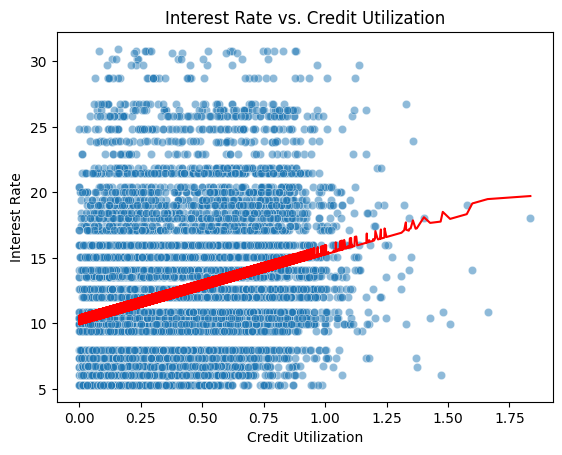

In [50]:

sns.scatterplot(x='credit_util', y='interest_rate', data=loans, alpha=0.5)
sns.lineplot(x=loans['credit_util'], y=model.predict(X), color='red')
plt.xlabel('Credit Utilization')
plt.ylabel('Interest Rate')
plt.title('Interest Rate vs. Credit Utilization')
plt.show()
    


-   **Your turn:** Interpret the intercept and the slope.

Intercept: Borrowers with 0 credit utilization are predicted, on average, to get an interest rate of 10.5%.

Slope: For each additional point credit utilization is higher, interest rate is predicted to be higher, on average, by 4.73%.
    


## Interest rate vs. homeownership

Next we predict interest rates from homeownership, which is a categorical predictor with three levels:
    

In [51]:

homeownership_levels = loans['homeownership'].cat.categories
print(homeownership_levels)
    

Index(['Rent', 'Mortgage', 'Own'], dtype='object')



-   **Demo:** Fit the linear regression model to predict interest rate from homeownership and display a summary of the model. Write the estimated model output below.
    

In [52]:
# add code here


-   **Your turn:** Interpret each coefficient in context of the problem.

*Add response here.*
    


## Interest rate vs. credit utilization and homeownership

### Main effects model

-   **Demo:** Fit a model to predict interest rate from credit utilization and homeownership, **without** an interaction effect between the two predictors. Display the summary output and write out the estimated regression equation.
    

In [53]:
# add code here


*Add response here.*

-   **Demo:** Write the estimated regression equation for loan applications from each of the homeownership groups separately.
    -   Rent: *Add response here.*
    -   Mortgage: *Add response here.*
    -   Own: *Add response here.*
-   **Question:** How does the model predict the interest rate to vary as credit utilization varies for loan applicants with different homeownership status. Are the rates the same or different?

*Add response here.*
    


### Interaction effects model

-   **Demo:** Fit a model to predict interest rate from credit utilization and homeownership, **with** an interaction effect between the two predictors. Display the summary output and write out the estimated regression equation.
    

In [54]:
# add code here


*Add response here.*

-   **Demo:** Write the estimated regression equation for loan applications from each of the homeownership groups separately.
    -   Rent: *Add response here.*
    -   Mortgage: *Add response here.*
    -   Own: *Add response here.*
-   **Question:** How does the model predict the interest rate to vary as credit utilization varies for loan applicants with different homeownership status. Are the rates the same or different?

*Add response here.*
    


### Choosing a model

Rule of thumb: **Occam's Razor** - Don't overcomplicate the situation!
We prefer the *simplest* best model.
    

In [55]:
# add code here


-   **Review:** What is R-squared? What is adjusted R-squared?

*Add response here.*

-   **Question:** Based on the adjusted $R^2$s of these two models, which one do we prefer?

*Add response here.*
    


## Another model to consider

-   **Your turn:** Let's add one more model to the variable -- issue month. Should we add this variable to the interaction effects model from earlier?
    

In [56]:
# add code here


*Add response here.*
    